<a href="https://colab.research.google.com/github/wereketenge/Proyectos/blob/main/Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From: https://drive.google.com/uc?id=1apWq5aronhltplYtCR3rT3dSYN8JRC27
To: /content/books_dataset.csv
100%|██████████| 1.13M/1.13M [00:00<00:00, 133MB/s]

✅ Registros después de limpiar: 89

📚 Libros más largos:


,title,pages
879,Library of Congress Subject Headings: P-Z,1546.0
731,Library of Congress Subject Headings,1396.0
618,Research in Education,1262.0
764,Mikhail Bakhtin,1108.0
1799,Camping & Wilderness Survival,1092.0
405,Code of Federal Regulations,1084.0
31,The Bohemian,896.0
1956,Encyclopedia of Creativity: A-H,873.0
1970,"A Textbook on Engineering Mathematics -1(MDU,K...",870.0
1781,J.R.R. Tolkien Encyclopedia,810.0


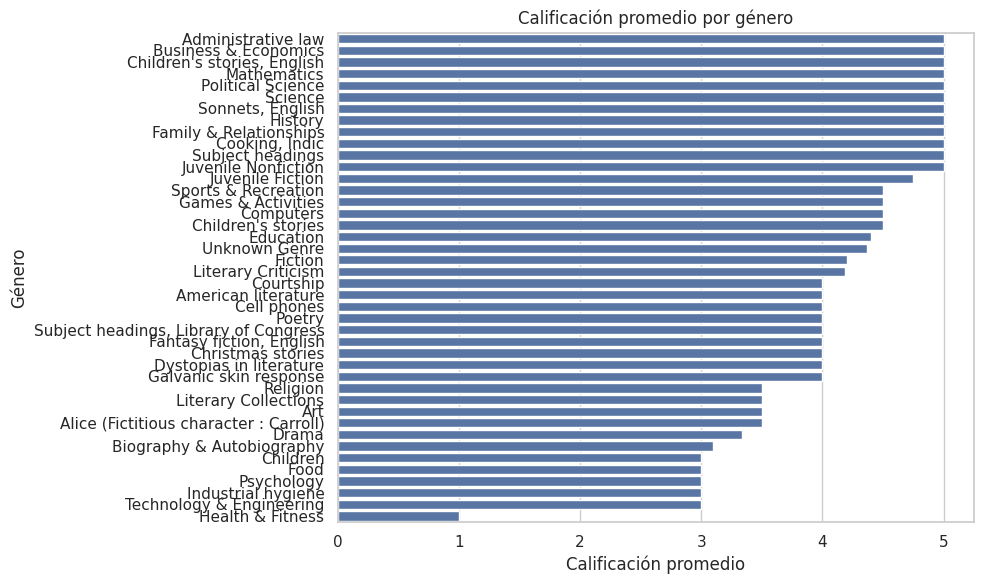

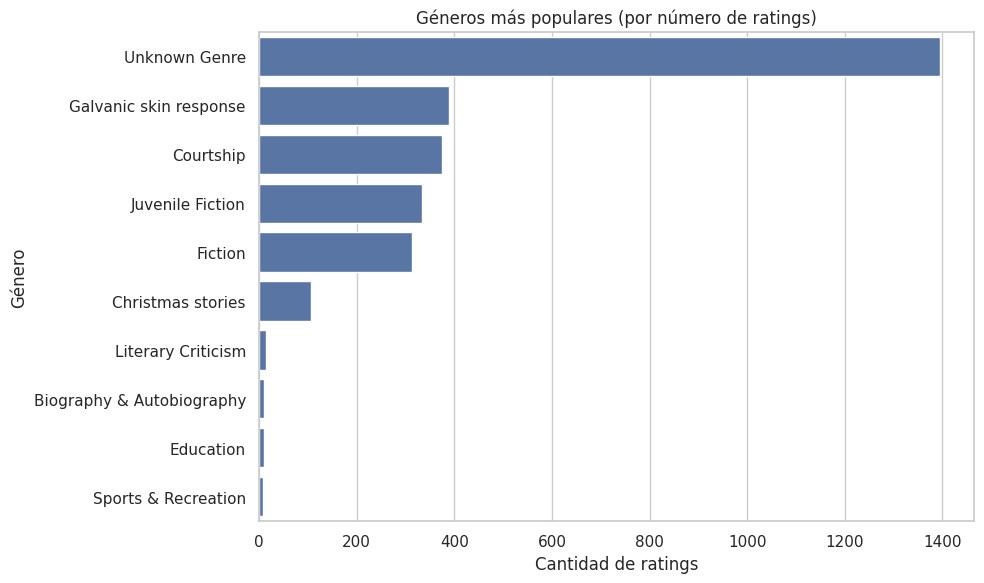

/tmp/ipython-input-3-4143501843.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['published_date'].dt.year


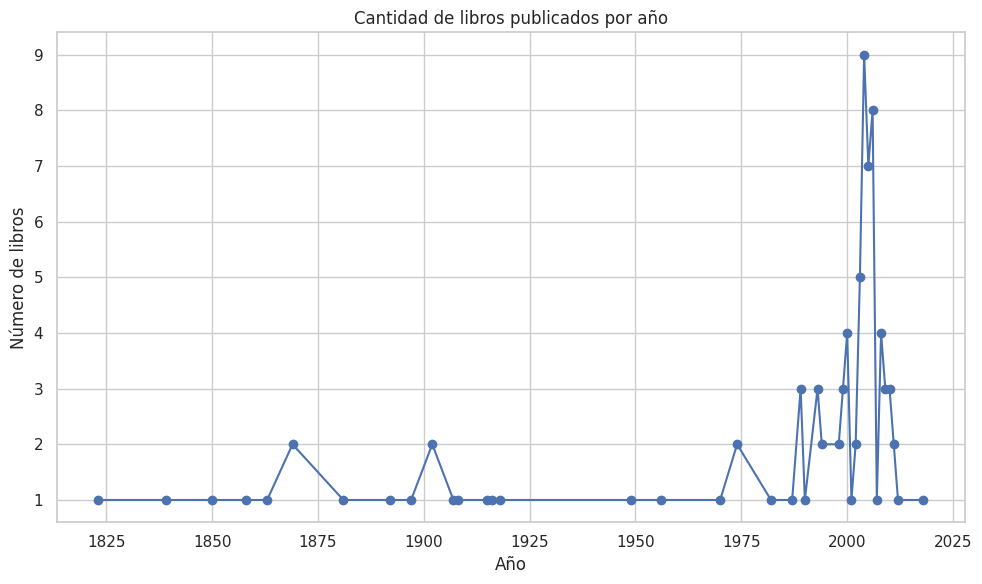

🧠 Principales insights:
- Algunos géneros destacan por calificaciones consistentemente altas (valor percibido).
- La popularidad por género muestra cuáles libros tienen más atención del público.
- La evolución anual permite observar posibles tendencias del mercado editorial.


In [3]:
!pip install -U gdown

import gdown

# ID del archivo (de tu enlace compartido)
file_id = '1apWq5aronhltplYtCR3rT3dSYN8JRC27'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'books_dataset.csv', quiet=False)

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Cargar el dataset
df = pd.read_csv('books_dataset.csv')

# Limpieza y conversión de tipos
# Convertir columnas numéricas
num_cols = ['pages', 'average_rating', 'ratings_count']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir fechas
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

# Eliminar registros con datos clave faltantes
df_clean = df.dropna(subset=['genre', 'average_rating', 'ratings_count', 'published_date'])

print(f"✅ Registros después de limpiar: {len(df_clean):,}")

# Libros con más páginas
top_pages = df_clean[['title', 'pages']].sort_values(by='pages', ascending=False).head(10)
print("\n📚 Libros más largos:")
display(top_pages)

# Calificación promedio por género
genre_rating = df_clean.groupby('genre')['average_rating'].mean().sort_values(ascending=False)

plt.figure()
sns.barplot(x=genre_rating.values, y=genre_rating.index)
plt.title('Calificación promedio por género')
plt.xlabel('Calificación promedio')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

# Popularidad por género (número de ratings)
genre_popularity = df_clean.groupby('genre')['ratings_count'].sum().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Géneros más populares (por número de ratings)')
plt.xlabel('Cantidad de ratings')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

# Evolución anual de publicaciones
df_clean['year'] = df_clean['published_date'].dt.year
books_per_year = df_clean['year'].value_counts().sort_index()

plt.figure()
books_per_year.plot(marker='o')
plt.title('Cantidad de libros publicados por año')
plt.xlabel('Año')
plt.ylabel('Número de libros')
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones
print("🧠 Principales insights:")
print("- Algunos géneros destacan por calificaciones consistentemente altas (valor percibido).")
print("- La popularidad por género muestra cuáles libros tienen más atención del público.")
print("- La evolución anual permite observar posibles tendencias del mercado editorial.")

